In [4]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.9/36.9 MB 8.2 MB/s eta 0:00:00a 0:00:01


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.datasets import load_acsf1
from sktime.split import temporal_train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Devi Mahajan
#### 5.3.25
# Week 7 Time Series Classification
***

### Part 1: 35 pts Understanding the dataset
***

In [18]:
!pip install aeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 5.3 MB/s eta 0:00:00a 0:00:01


#### A: 7pts Give a verbal description of the dataset from information on the acsf1 detailed webpage, not the summary repository page.


In [20]:
from aeon.datasets import load_classification
X, y = load_classification("GunPoint")
print(" Shape of X = ", X.shape)
print("Shape of y:", y.shape)
print("First few labels:", y[:5])

 Shape of X =  (200, 1, 150)
Shape of y: (200,)
First few labels: ['2' '2' '1' '1' '2']


In [31]:
X_train, y_train = load_classification("ACSF1", split="train")
X_test, y_test = load_classification("ACSF1", split="test") 

This dataset is comprised of the power consumption of household appliances. It represents the power consumption patterns demonstrated by these appliances, and captures how energy usage changes over time, making it ideal for time series analysis, with 10 different appliance types represented. Each observation consists of 1460 time steps representing 10-second intervals.

#### B: 7pts There are 1460 time steps in each observation. Use len() to display this for any observation in the X_train


In [53]:
print("Length of time steps in one observation:", X_train.shape[2])

Length of time steps in one observation: 1460


#### C: 7pts Return the counts of classes in y_train


In [58]:
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution in y_train:")
for cls, count in zip(unique, counts):
    print(f"Class {cls}: {count}")

Class distribution in y_train:
Class 0: 10
Class 1: 10
Class 2: 10
Class 3: 10
Class 4: 10
Class 5: 10
Class 6: 10
Class 7: 10
Class 8: 10
Class 9: 10


#### D: 7pts Plot the first time series for each class(.iloc[0]), label each plot with its specified class name. The patterns should match what can be found on the acsf1 detailed webpage.


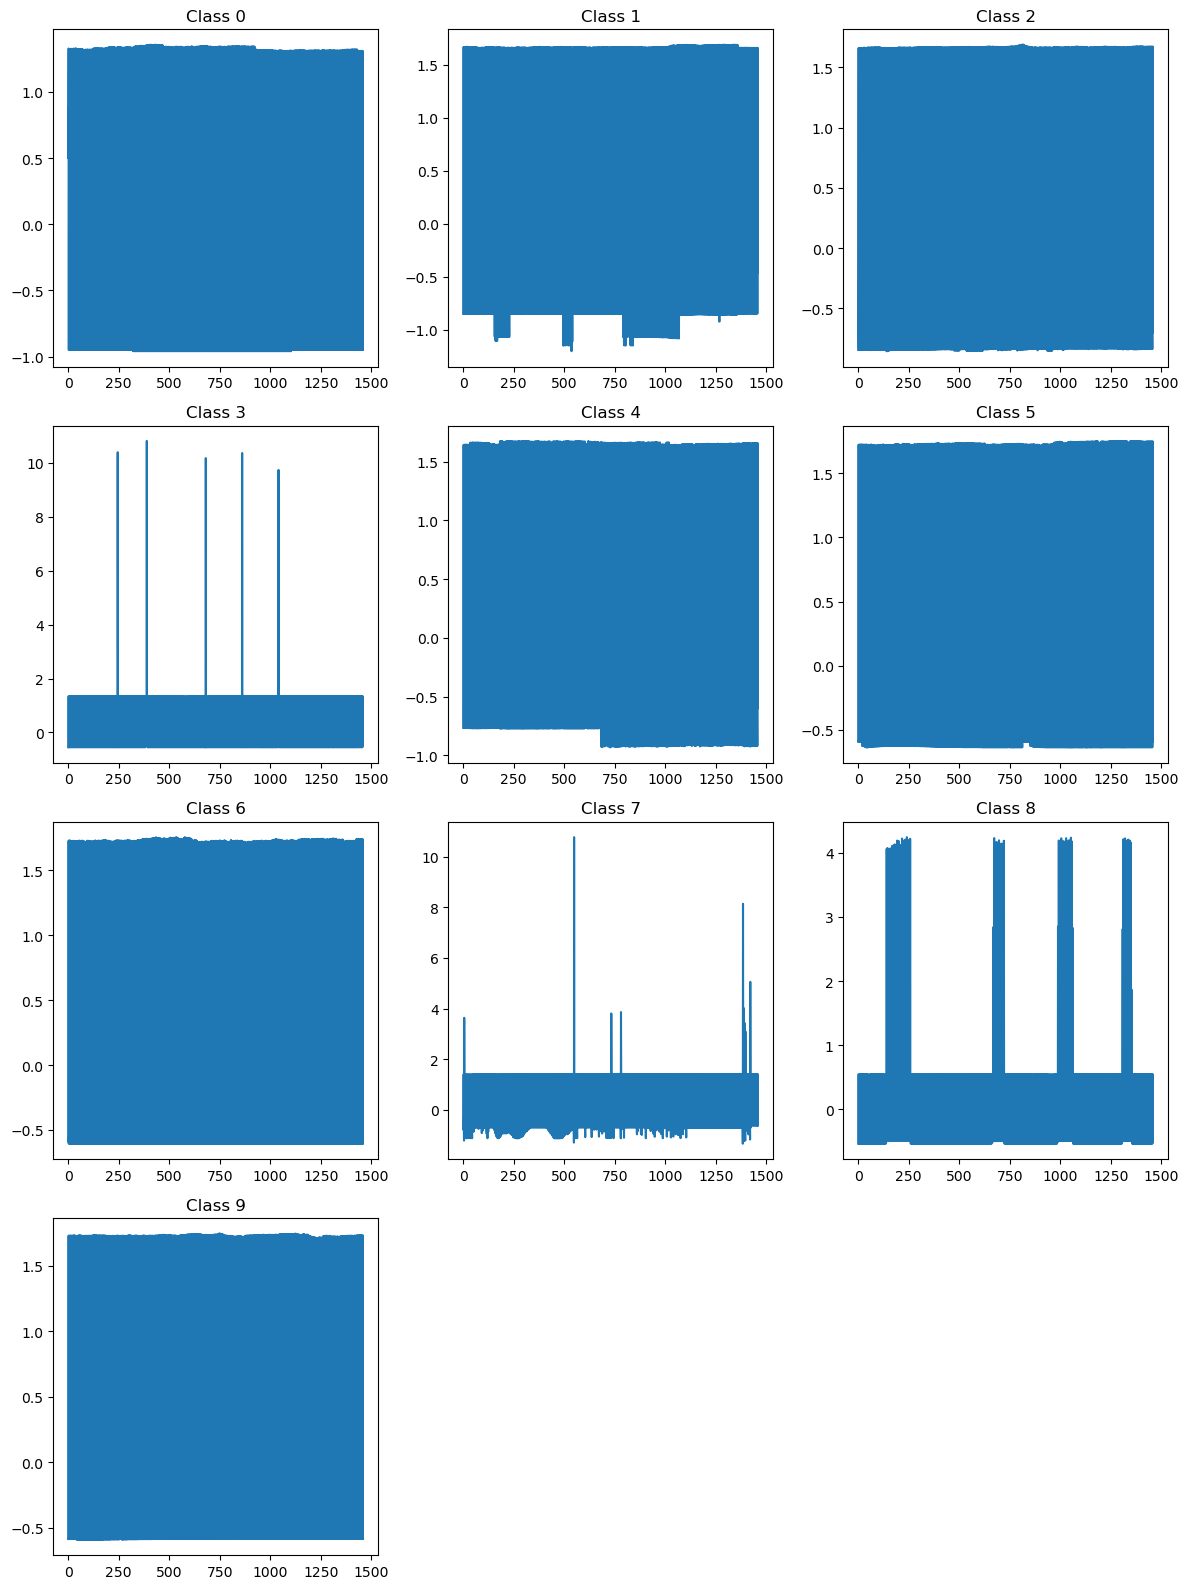

In [71]:
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
rows = (num_classes // 3) + (num_classes % 3 > 0)

fig, axes = plt.subplots(rows, 3, figsize=(12, 4 * rows))  
axes = axes.flatten() 

for i, class_label in enumerate(unique_classes):
    axes[i].plot(X_train[y_train == class_label][0, 0])
    axes[i].set_title(f"Class {class_label}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### E: 7pts Each observation is 10 seconds apart. Describe what the plots show for classes 3, 8 and 9. Give some intuition about what appliance each of these three classes might represent.


Class 3 has brief high power spikes at irregular intervals, suggesting that it is an appliance with a cooling/heating system that self-regulates, such as a refrigerator. Class 8 displays 4 distinct usage periods of similar widths, suggesting that it is an appliance with a regular cycle, such as a washing machine or a microwave. Finally, class 9 shows regular usage with no spikes, suggesting an appliance that utilises a steady amount of power and remains on constantly, such as a router or a home security system. 

### Part 2: 15 pts Description of Time Series Classification models
***


#### A: 5 pts Select one classification model type. Describe how the model works. Why would each be a good or bad fit for this type of data?


**Random Forest**: this is an ensemble model using multiple decision trees to classify data. It captures both global and local trends and is robust to noise, which might make it good for this dataset. However, its feature extraction is limited and basic compared to other models, which might make it miss more complex trends.

#### B: 5 pts Select a second classification model type. Describe how the model works. Why would each be a good or bad fit for this type of data?


**K-nearest neighbours:** this is a classification model that operates based on similarity to the nearest training examples. It's a non-parametric model which can be good for capturing complex trends in data, unlike RF. However, it is sensitive to noise and takes a long time to run, which makes it difficult to work with when it comes to large/noisy datasets.

#### C: 5 pts Select third classification model type. Describe how the model works. Why would each be a good or bad fit for this type of data?


**CNN:** this applies layers to extract local patterns and features from time series segments. It detects both local and global patterns, and is robust to noise when trained fully, but requires substantial training, computational power, and large datasets in order to function optimally.

### Part 3: 50 pts Select one method. Model and examine results
***

#### A: 10 pts Select only one method. Fit your model. Feel free to adjust parameters or try a grid search (optional)


In [87]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train[:, 0, :], y_train)

RandomForestClassifier(random_state=42)

#### B: 10 pts Return the accuracy score of the train set and test set (suggestion to use .score()). Print the confusion matrix and classification report of the test set.


In [90]:
train_acc = accuracy_score(y_train, clf.predict(X_train[:, 0, :]))
test_acc = accuracy_score(y_test, clf.predict(X_test[:, 0, :]))
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.7900


In [92]:
y_pred = clf.predict(X_test[:, 0, :])
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 8  0  0  0  1  0  1  0  0  0]
 [ 0  7  2  0  0  0  0  1  0  0]
 [ 0  1  8  0  0  1  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  1  0]
 [ 0  1  2  0  7  0  0  0  0  0]
 [ 0  0  1  0  0  7  0  1  0  1]
 [ 0  0  1  0  0  0  7  1  0  1]
 [ 0  0  0  0  0  0  0  8  1  1]
 [ 0  0  0  2  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.78      0.70      0.74        10
           2       0.57      0.80      0.67        10
           3       0.82      0.90      0.86        10
           4       0.88      0.70      0.78        10
           5       0.88      0.70      0.78        10
           6       0.88      0.70      0.78        10
           7       0.73      0.80      0.76        10
           8       0.80      0.80      0.80        10
           9       0.77      1.00      0.87        10

    accuracy                    

#### C: 10 pts Discuss the precision score for class 8. Support this with your visual opinion from plots in 1D as well as the confusion matrix.


In [95]:
report = classification_report(y_test, y_pred, output_dict=True)
print(f"Precision for class 8: {report['8']['precision']:.4f}")

Precision for class 8: 0.8000


A 0.80 precision means 80% of predictions labeled as class 8 are correct. Reducing confusion with neighboring classes could improve precision. This seems likely, as we can see in the plots in 1D, the majority of the data in class 8 is consistent, barring spikes in usage, which could have been misclassified. The confusion matrix shows us that there are 8 true positives, and 2 false positives, which is aligned with our precision score.

#### D: 10 pts Discuss the recall score for class 5. Support this with your visual opinion from plots in 1D as well as the confusion matrix.


In [100]:
print(f"Recall for class 5: {report['5']['recall']:.4f}")

Recall for class 5: 0.7000


A 0.70 recall means 70% of actual class 5 instances were identified correctly, while 30% were misclassified. We can say that the model needs better separation of class 5 from its neighboring classes. Class 5 seems to have fairly consistent energy use, which would support high recall as there are fewer instances to classify outside of the norm. Moreover, the confusion matrix shows us that there are 7 true positives and 3 false negatives. Feature engineering or the use of a different classifier may improve recall.


#### E: 10 pts Which metric do you feel is the most important in the following business case: You work for ComEd, a local electricity supplier. You head a department that uses analytics to plan electrical supply for Chicago's power grid. Assume that your department budgets for a certain amount of electrical supply at a fixed low rate. If the total demand in Chicago stays within the purchased supply levels, your department is performing. If the demand breaches this supply level, the company is penalized and the rate for your supply multiplies by 100x, destroying your department’s performance. If you had to build your forecast model to classify patterns of high electrical usage (appliances, air conditioning, water heating) vs low electrical usage (lighting, tv, phone chargers) which metric (precision or recall) would you use?


Here, recall is the more important metric, because it measures the proportion of correctly identified high usage patterns. Failing to detect high-usage patterns could be catastrophic and incur penalities, while mistakenly classifying low-usage as high-usage (as exemplified by precision) would not cause you to breach the supply level. In this way, recall captures high usage patterns that would contribute to a supply level breach, and should be considered closely in this scenario.